Nama : Muhamad Zidan Husaini<br>
NIM : 211351092<br>
Kelas : Pagi B

# IMPORT DATASET

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhamadzidanhusaini","key":"3c611bab084611ab2098fa7e13ec9dcf"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d benroshan/factors-affecting-campus-placement

  0% 0.00/4.51k [00:00<?, ?B/s]
100% 4.51k/4.51k [00:00<00:00, 5.87MB/s]


In [ ]:
!mkdir factors-affecting-campus-placement
!unzip factors-affecting-campus-placement.zip -d factors-affecting-campus-placement
!ls factors-affecting-campus-placement

Archive:  factors-affecting-campus-placement.zip
  inflating: factors-affecting-campus-placement/Placement_Data_Full_Class.csv  
Placement_Data_Full_Class.csv


# IMPORT LIBRARY YANG DIGUNAKAN

In [ ]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('/content/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')

# DATA DISCOVERY

In [ ]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
df.shape

(215, 15)

In [ ]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

# EDA

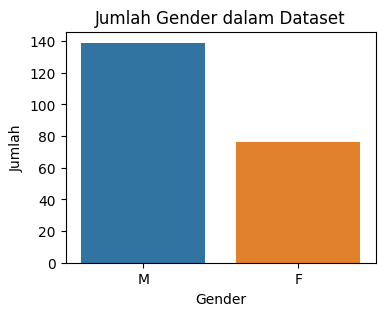

In [ ]:
fig, axs = plt.subplots(ncols=1, figsize=(4,3))
sns.countplot(x='gender', data=df, ax=axs)
axs.set_xlabel('Gender')
axs.set_ylabel('Jumlah')
axs.set_title('Jumlah Gender dalam Dataset')
plt.show()

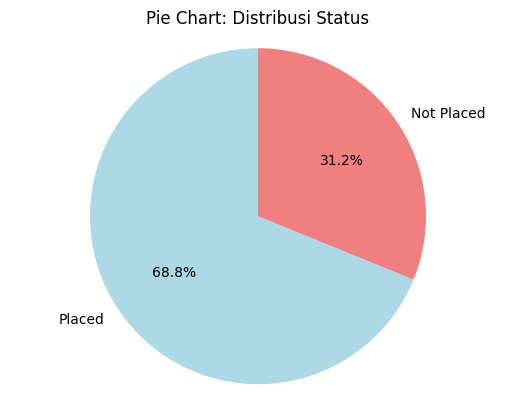

In [ ]:
# Membuat pie chart
status_counts = df['status'].value_counts()
labels = status_counts.index
sizes = status_counts.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
ax.axis('equal')

# Menambahkan judul
plt.title('Pie Chart: Distribusi Status')

# Menampilkan pie chart
plt.show()

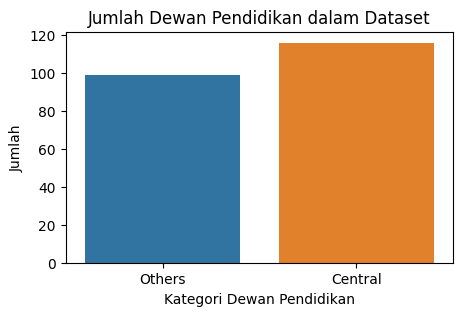

In [ ]:
fig, axs = plt.subplots(ncols=1, figsize=(5,3))
sns.countplot(x='ssc_b', data=df, ax=axs)
axs.set_xlabel('Kategori Dewan Pendidikan')
axs.set_ylabel('Jumlah')
axs.set_title('Jumlah Dewan Pendidikan dalam Dataset')
plt.show()

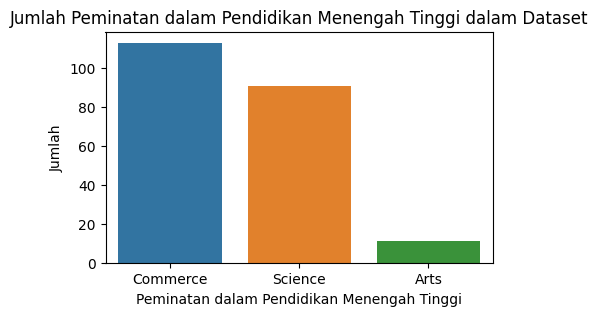

In [ ]:
fig, axs = plt.subplots(ncols=1, figsize=(5,3))
sns.countplot(x='hsc_s', data=df, ax=axs)
axs.set_xlabel('Peminatan dalam Pendidikan Menengah Tinggi')
axs.set_ylabel('Jumlah')
axs.set_title('Jumlah Peminatan dalam Pendidikan Menengah Tinggi dalam Dataset')
plt.show()

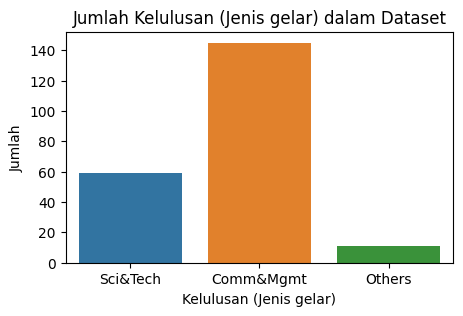

In [ ]:
fig, axs = plt.subplots(ncols=1, figsize=(5,3))
sns.countplot(x='degree_t', data=df, ax=axs)
axs.set_xlabel('Kelulusan (Jenis gelar)')
axs.set_ylabel('Jumlah')
axs.set_title('Jumlah Kelulusan (Jenis gelar) dalam Dataset')
plt.show()

<Axes: xlabel='status', ylabel='degree_p'>

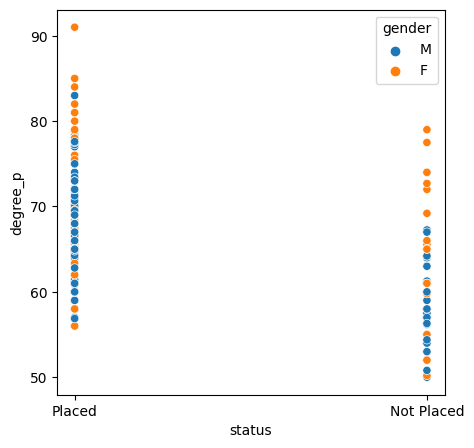

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='status', y = 'degree_p', hue ='gender', data = df)

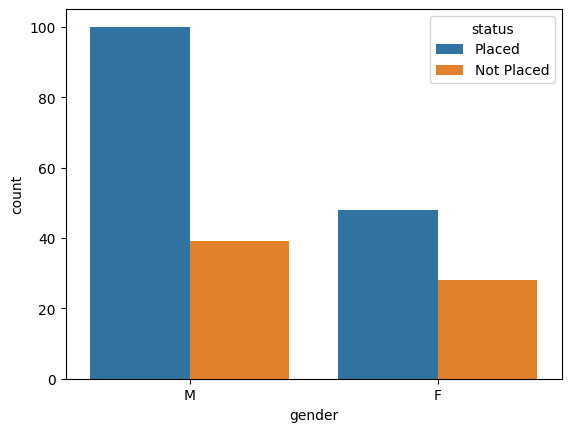

In [ ]:
sns.countplot(x="gender", hue="status", data=df)
plt.show()

<Axes: xlabel='hsc_s', ylabel='count'>

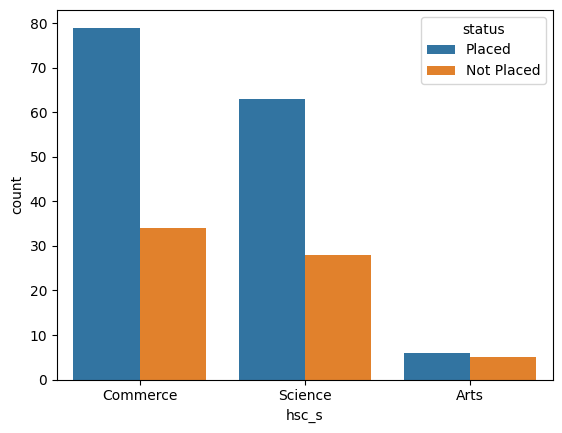

In [ ]:
sns.countplot(x="hsc_s", hue="status", data=df)

<ipython-input-21-305ca89a1be9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['salary'], bins=50, hist=False)


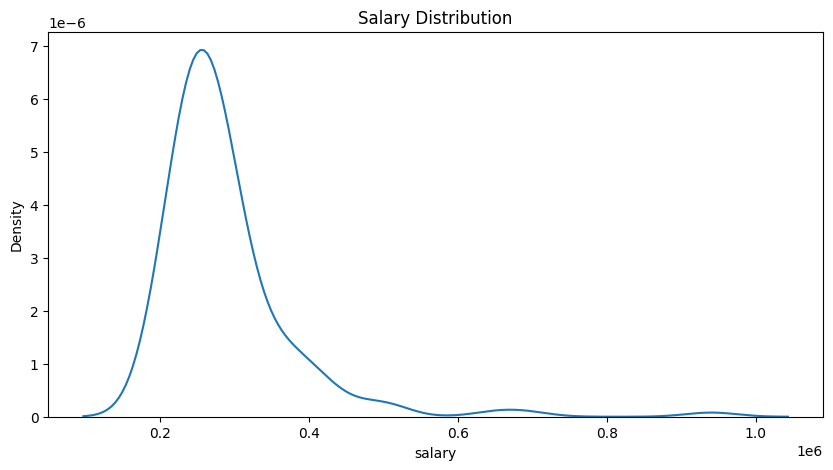

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df['salary'], bins=50, hist=False)
plt.title("Salary Distribution")
plt.show()

Melihat distribusinya, kita dapat mengatakan bahwa sebagian besar siswa mendapatkan paket antara 200 ribu-400 ribu dan sebagian besar gaji di atas 400 ribu adalah outlier.

# PREPROCESSING

In [ ]:
df = df.drop(['sl_no','ssc_b'],axis=1)
df.head()

,gender,ssc_p,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
df['salary'] = df['salary'].fillna(0)
df.isnull().sum()

gender            0
ssc_p             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   hsc_p           215 non-null    float64
 3   hsc_b           215 non-null    object 
 4   hsc_s           215 non-null    object 
 5   degree_p        215 non-null    float64
 6   degree_t        215 non-null    object 
 7   workex          215 non-null    object 
 8   etest_p         215 non-null    float64
 9   specialisation  215 non-null    object 
 10  mba_p           215 non-null    float64
 11  status          215 non-null    object 
 12  salary          215 non-null    float64
dtypes: float64(6), object(7)
memory usage: 22.0+ KB


In [ ]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [ ]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
df['salary'] = pd.cut(df['salary'], bins=[0, 300000, 600000, 940000], labels=['rendah', 'sedang', 'tinggi'])

In [ ]:
ind_col = [col for col in df.columns if col!= 'status']
dep_col = 'status'

In [ ]:
df['salary'].fillna('rendah', inplace=True)
df.head()

,gender,ssc_p,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,rendah
1,M,79.33,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,rendah
2,M,65.00,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,rendah
3,M,56.00,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,rendah
4,M,85.80,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,sedang


In [ ]:
df.isnull().sum()

gender            0
ssc_p             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   gender          215 non-null    object  
 1   ssc_p           215 non-null    float64 
 2   hsc_p           215 non-null    float64 
 3   hsc_b           215 non-null    object  
 4   hsc_s           215 non-null    object  
 5   degree_p        215 non-null    float64 
 6   degree_t        215 non-null    object  
 7   workex          215 non-null    object  
 8   etest_p         215 non-null    float64 
 9   specialisation  215 non-null    object  
 10  mba_p           215 non-null    float64 
 11  status          215 non-null    object  
 12  salary          215 non-null    category
dtypes: category(1), float64(5), object(7)
memory usage: 20.6+ KB


In [ ]:
numerical = []
catgcol = []

for col in df.columns:
  if df[col].dtype=='float64':
    numerical.append(col)
  else:
    catgcol.append(col)

for col in df.columns:
  if col in numerical:
    df[col].fillna(df[col].median(), inplace=True)
  else:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
numerical

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

In [ ]:
catgcol

['gender',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status',
 'salary']

In [ ]:
le = LabelEncoder()

for col in catgcol:
  df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,gender,ssc_p,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,1,1,58.00,2,0,55.0,1,58.80,1,0
1,1,79.33,78.33,1,2,77.48,2,1,86.5,0,66.28,1,0
2,1,65.00,68.00,0,0,64.00,0,0,75.0,0,57.80,1,0
3,1,56.00,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0
4,1,85.80,73.60,0,1,73.30,0,0,96.8,0,55.50,1,1


In [ ]:
df['status'].value_counts()

1    148
0     67
Name: status, dtype: int64

# MODELING

In [ ]:
X = df.drop("status",axis = 1)
y = df.status

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 80.0 % and k = [7, 9, 10, 11, 13, 14]


In [ ]:
knn = KNeighborsClassifier(7)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8

In [ ]:
df.head()

,gender,ssc_p,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,1,1,58.00,2,0,55.0,1,58.80,1,0
1,1,79.33,78.33,1,2,77.48,2,1,86.5,0,66.28,1,0
2,1,65.00,68.00,0,0,64.00,0,0,75.0,0,57.80,1,0
3,1,56.00,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0
4,1,85.80,73.60,0,1,73.30,0,0,96.8,0,55.50,1,1


In [ ]:
input_data = (1,67.00,91.00,1,1,58.00,2,0,55.0,1,58.80,0)

input_data_as_numpy_array = np.array(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = knn.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('Mahasiswa tidak lolos')
else:
  print('Mahasiswa lolos')

[1]
Mahasiswa lolos


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# VISUALISASI HASIL ALGORITMA

Text(0.5, 23.52222222222222, 'Predicted label')

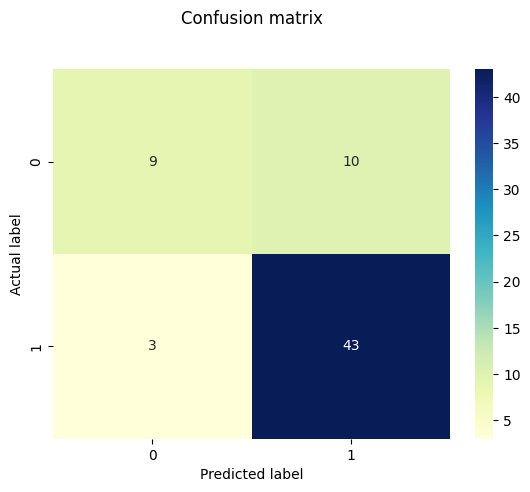

In [ ]:
y_pred = knn.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.47      0.58        19
           1       0.81      0.93      0.87        46

    accuracy                           0.80        65
   macro avg       0.78      0.70      0.72        65
weighted avg       0.79      0.80      0.78        65



#SAVE MODEL

In [ ]:
filename = 'KNN_campus.sav'
pickle.dump(knn, open(filename,'wb'))